<a href="https://colab.research.google.com/github/bikashrpadhy/Deep-Learning/blob/main/DL_AS1BatchGradDesc_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST digit classification in NN **without** using pytorch/ tensorflow library
- Batch Gradient Descent
- MNIST 1 vs Rest
- Binary Classification

In [2]:
import pandas as pd
import numpy as np
import pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# Activation Functions
def ReLU(Z):
    return np.maximum(Z,0)

def derivative_ReLU(Z):
    return Z > 0

# For experimenting
# def softmax(Z):
#     """Compute softmax values for each sets of scores in x."""
#     exp = np.exp(Z - np.max(Z)) # the np.max(Z) avoids an overflow by decreasing the content of exp
#     return exp / exp.sum(axis=0)

def sigmoid(Z):
    exp= np.exp(Z)
    return exp/(1+exp)

def derivative_sigmoid(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

In [5]:
def init_params(size):
    W1 = np.random.rand(10,size) - 0.5
    b1 = np.random.rand(1, 10) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(1, 10) - 0.5

    W3 = np.random.rand(1,10) - 0.5  # output layer
    b3 = np.random.rand(1, 1) - 0.5
    return W1,b1,W2,b2,W3,b3

def forward_propagation(X,W1,b1,W2,b2,W3,b3):
    Z1 = X.dot(W1.T) + b1     # m, 10
    # print("Z1.shape: ", Z1.shape)
    A1 = sigmoid(Z1)           # m, 10
    Z2 = A1.dot(W2.T) + b2    # m, 10
    A2 = sigmoid(Z2)        # m, 10
    Z3 = A2.dot(W3.T) + b3    # m, 1
    A3 = sigmoid(Z3)        # m, 1



    # print("A3.shape: ", A3.shape) # printed A3.shape:  (60000, 1)
    return Z1, A1, Z2, A2, Z3, A3

def one_hot(Y):
    ''' return an 0 vector with 1 in the position corresponding to the value in Y'''
    one_hot_Y = np.zeros((Y.max()+1,Y.size)) # size = (Y.size= no of rows, Y.max+1 = 10)
    one_hot_Y[Y,np.arange(Y.size)] = 1 # go to the column of Y (eg Where Y=4) then make that value 1
    return one_hot_Y
    # done

In [6]:
def backward_propagation(X, Y, A1, A2, A3, W2, W3, Z1, Z2, m):
    # print("backpropagation started")
    dZ3= 1/m * (A3 - Y)                   # m, 1
    # print("dZ3.shape: ", dZ3.shape)
    # dZ2 = 1/m *(A2 - Y)                # m, 1
  # shapes (10,784) (60000,)
    dA2= dZ3.dot(W3)                   # m, 10
    dZ2= dA2* derivative_sigmoid(Z2)   # m, 10
    dW3= dZ3.T.dot(A2)
    db3= np.sum(dZ3, 0)  #10, 1
    dA1= dZ2.dot(W2)                   # m, 10
    # print("dA1.shape: ",dA1.shape)
    dZ1= dA1* derivative_sigmoid(Z1)   # m, 10          # *= elementwise_multiplication
    # print("dZ1.shape: ", dZ1.shape)
    dW2= dZ2.T.dot(A1)
    db2= np.sum(dZ2, 0) # 10, 1

    dW1= dZ1.T.dot(X)
    db1= np.sum(dZ1, 0) # 10, 1
    # print("db1.shape: ", db1.shape) #  printed: db1.shape:  (10,)



    # ***********************
    # dZ2 = 2*(A2 - Y)                # 10,m
    # dW2 = 1/m * (dZ2.dot(A1.T))             # 10 , 10
    # db2 = 1/m * np.sum(dZ2,1)               # 10, 1
    # dZ1 = W2.T.dot(dZ2)*derivative_sigmoid(Z1) # 10, m
    # dW1 = 1/m * (dZ1.dot(X.T))              # 10, 784
    # db1 = 1/m * np.sum(dZ1,1)               # 10, 1
    # ***********************
    return dW1, db1, dW2, db2, dW3, db3

def update_params(alpha, W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3):
    # alpha is learning rate
    W1 -= alpha * dW1
    b1 -= alpha * db1 # np.reshape(db1, (10,1))
    # cannot reshape array of size 60000 into shape (10,1)
    W2 -= alpha * dW2
    b2 -= alpha * db2 #np.reshape(db2, (10,1))
    W3 -= alpha * dW3
    b3 -= alpha * db3 # np.reshape(db3, (10,1))

    return W1, b1, W2, b2, W3, b3

def get_predictions(A3):
  A3[A3>0.5]=1
  A3[A3<=0.5]=0
  return A3

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

In [11]:
def gradient_descent(X, Y, alpha, iterations):
    m, size = X.shape # m= number of rows/ instances; size is number of classes

    W1,b1,W2,b2,W3,b3 = init_params(size)
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X, W1,b1,W2,b2,W3,b3)
        dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X, Y, A1, A2, A3, W2, W3, Z1, Z2, m)

        W1, b1, W2, b2, W3, b3 = update_params(alpha, W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3)

        if (i+1) % int(iterations/10) == 0:
            print(f"Iteration: {i+1} / {iterations}")
            prediction = get_predictions(A3)
            print(f'{get_accuracy(prediction, Y):.3%}')
    # print("np.sum(A3): ", np.sum(A3))
    return W1, b1, W2, b2, W3, b3

def make_predictions(X, W1 ,b1, W2, b2, W3, b3):
    __, __, __, __, __, A3 = forward_propagation(X, W1,b1,W2,b2,W3,b3)
    predictions = get_predictions(A3)
    return predictions

def show_prediction(index,X, Y, W1, b1, W2, b2, W3, b3):

    # X.shape is (10000, 784)
    vect_X = X[index, :, None].T

    print("vect_X.shape: ", vect_X.shape) # printed- vect_X.shape:  (784, 1)

    prediction = make_predictions(vect_X, W1 ,b1, W2, b2, W3, b3)
    label = Y[index]

    if prediction[0][0]==0:
      print("Predicted NOT 9")
    else :
      print("Predicted 9")
    # print("Prediction: ", )

    if label==0:
      print("Actual Label NOT 9 ")
    else :
      print("Actual Label 9 ")

    current_image = vect_X.reshape((WIDTH, HEIGHT)) * SCALE_FACTOR # multiply by scale factor to undo the normalisation

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


In [28]:
# W1, b1, W2, b2, W3, b3 = batch_gradient_descent(X_train, Y_train, 0.15, 20)
def batch_gradient_descent(X, Y, alpha, epochs, batch_size):

  nsplits= X.shape[0]//batch_size
  sss = StratifiedShuffleSplit(n_splits=nsplits, test_size=0.2, random_state=0)

  for i in range(epochs):
    sss.get_n_splits(X, Y)
    for train_index, test_index in sss.split(X, Y):
      X_train, X_test = X[train_index], X[test_index]
      Y_train, Y_test = Y[train_index], Y[test_index]
      m, size = X_train.shape # m= number of rows/ instances; size is number of classes
      W1,b1,W2,b2,W3,b3 = init_params(size)
      Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X, W1,b1,W2,b2,W3,b3)
      dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X, Y, A1, A2, A3, W2, W3, Z1, Z2, m)

      W1, b1, W2, b2, W3, b3 = update_params(alpha, W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3)

    if (i+1) % int(epochs/10) == 0:
      print(f"Epoch: {i+1} / {epochs}")
      prediction = get_predictions(A3)
      print(f'{get_accuracy(prediction, Y):.3%}')
  # print("np.sum(A3): ", np.sum(A3))
  return W1, b1, W2, b2, W3, b3


We need to go through the entire training set in each iteration

In [29]:
#################################################### ************* MAIN **************** ###################################

from sklearn.model_selection import StratifiedShuffleSplit

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

SCALE_FACTOR = 255 # must divide, otherwise overflow occurs
WIDTH = X_train.shape[1]
# print(f"width :{WIDTH}")
HEIGHT = X_train.shape[2]
batch_size= 500

Y_train[Y_train!=9]= 0
Y_train[Y_train==9]= 1

Y_test[Y_test!=9]= 0
Y_test[Y_test==9]= 1

X_train = X_train.reshape(X_train.shape[0],WIDTH*HEIGHT) / SCALE_FACTOR # WIDTH*HEIGHT Vectorises the input images,
X_test =   X_test.reshape(X_test.shape[0],WIDTH*HEIGHT) / SCALE_FACTOR # /SCALE_FACTOR Normalises the pixel values

Y_train= np.reshape(Y_train, (60000, 1))
Y_test= np.reshape(Y_test, (10000, 1))

X= np.concatenate((X_train, X_test), axis=0)
Y= np.concatenate((Y_train, Y_test), axis=0)


# W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.15, 20)


W1, b1, W2, b2, W3, b3 = batch_gradient_descent(X, Y, 0.15, 20, 7000)
# def batch_gradient_descent(X, Y, alpha, epochs, batch_size):


Iteration: 2 / 20
63.834%
Iteration: 4 / 20
90.060%
Iteration: 6 / 20
9.940%
Iteration: 8 / 20
90.060%
Iteration: 10 / 20
12.107%
Iteration: 12 / 20
88.804%
Iteration: 14 / 20
9.940%
Iteration: 16 / 20
58.754%
Iteration: 18 / 20
88.784%
Iteration: 20 / 20
9.940%


In [24]:
Y_train.shape

(48000, 1)

In [19]:
for i, (train_index, test_index) in enumerate(sss.split(X_train, Y_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[22137 21955 26769 ... 21170  1920 25824]
  Test:  index=[29873  9169  4644 ...   540  9904 19280]
Fold 1:
  Train: index=[16283 18634 15010 ...  9984  8211 13316]
  Test:  index=[25187 28075 10001 ... 13605  7442 13747]
Fold 2:
  Train: index=[16139 10271 21303 ...  4986 29811  9356]
  Test:  index=[24767 17254  4284 ... 14116 25153 28252]
Fold 3:
  Train: index=[27636 26935 28392 ... 19717 12731  3909]
  Test:  index=[27344  7572 13762 ...  7322 14314  7306]
Fold 4:
  Train: index=[   46 24429 15719 ... 20826 12074 27816]
  Test:  index=[25372 27440 24767 ... 22090  5138  8583]
Fold 5:
  Train: index=[ 5061 12927 11468 ... 25954  9662 20826]
  Test:  index=[29854 18499  7650 ... 23156 21145  8397]
Fold 6:
  Train: index=[28518  9872  3194 ... 29008 20145 12805]
  Test:  index=[ 9067 29762  2316 ...  8904 27417  2612]
Fold 7:
  Train: index=[ 8386 22117 21646 ... 13844  6753  1507]
  Test:  index=[15290  9331 27799 ... 16048 24652 12461]
Fold 8:
  Train: index=[

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label NOT 9 


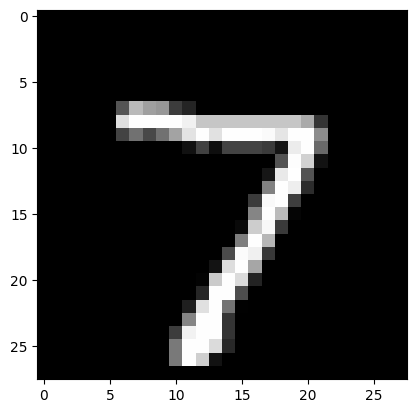

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label NOT 9 


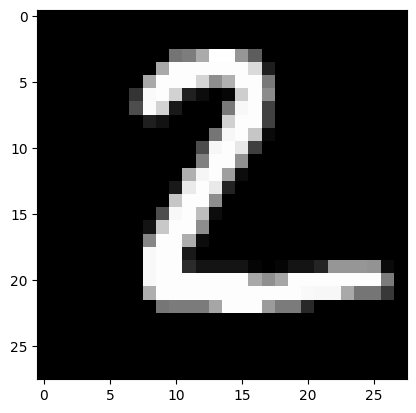

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label NOT 9 


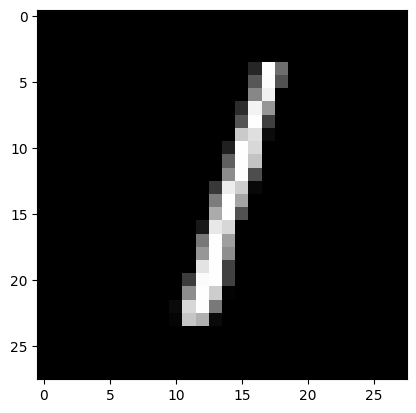

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label NOT 9 


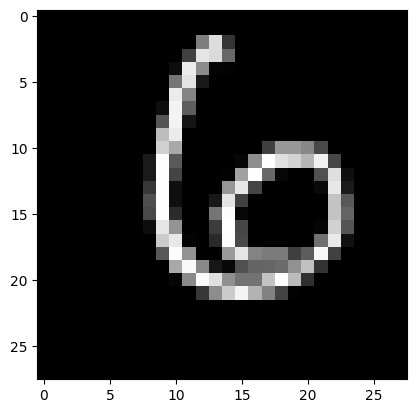

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label NOT 9 


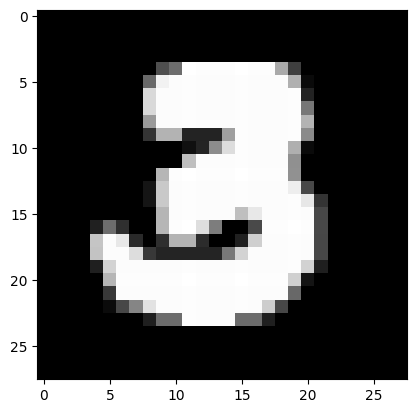

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


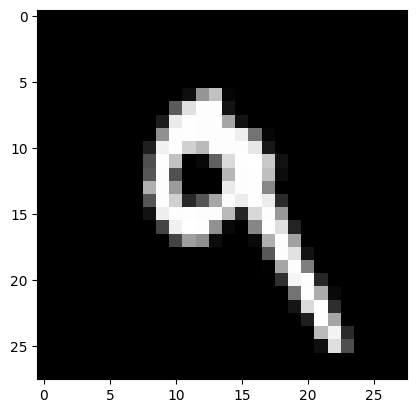

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


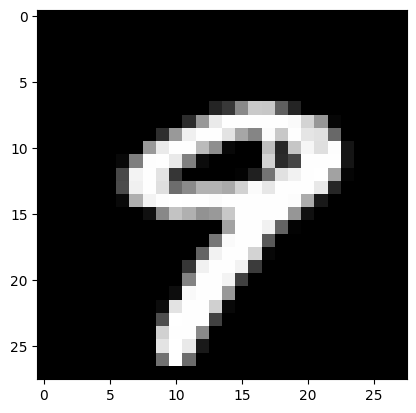

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


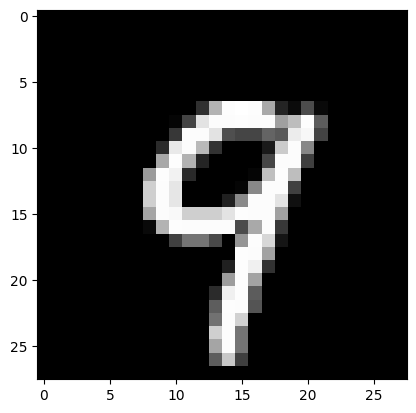

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


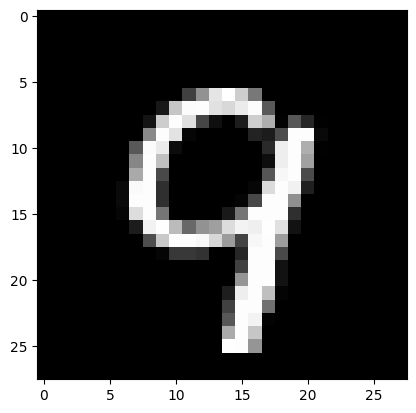

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


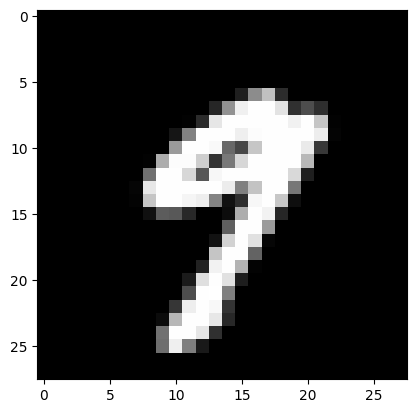

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


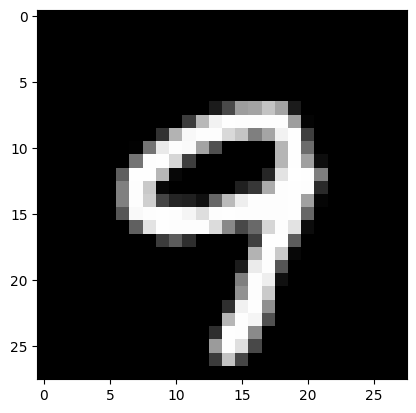

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


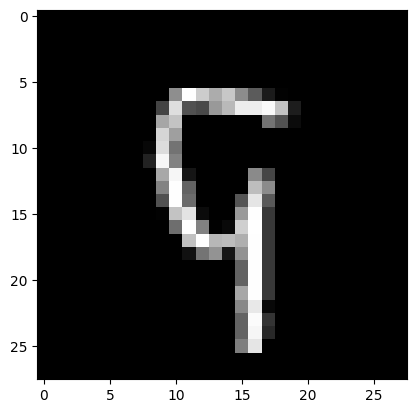

vect_X.shape:  (1, 784)
Predicted NOT 9
Actual Label 9 


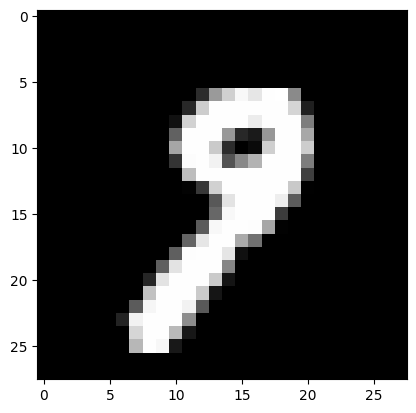

In [9]:
show_prediction(0,  X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(1,  X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(2,  X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(100,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(200,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(7,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(9,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(12,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(16,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(20,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(58,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(62,X_test, Y_test, W1, b1, W2, b2, W3, b3)
show_prediction(73,X_test, Y_test, W1, b1, W2, b2, W3, b3)

In [10]:
print(Y_test.shape) # printed: (10000,)
# Print all the indices where we have a 9
for i in range (Y_test.shape[0]):
  if Y_test[i]==1 :
    print(i)

(10000,)
7
9
12
16
20
58
62
73
78
92
99
104
105
108
113
118
125
150
151
185
193
206
209
212
214
235
241
252
264
273
274
281
284
292
315
320
322
336
359
389
394
414
417
422
426
434
448
454
471
479
481
487
488
496
501
521
530
558
560
562
575
593
598
599
616
627
630
634
639
662
671
673
678
681
706
733
758
759
773
788
813
833
862
874
882
893
906
913
928
954
962
966
992
999
1000
1005
1013
1045
1048
1058
1063
1081
1086
1088
1090
1103
1105
1107
1130
1152
1165
1183
1192
1217
1228
1232
1247
1255
1277
1282
1304
1308
1309
1311
1322
1327
1343
1380
1385
1396
1414
1417
1418
1423
1428
1429
1435
1439
1449
1452
1455
1481
1486
1492
1501
1508
1512
1532
1545
1553
1554
1559
1594
1596
1597
1622
1627
1631
1640
1645
1647
1648
1655
1666
1668
1695
1697
1709
1714
1732
1743
1745
1781
1787
1788
1793
1801
1812
1821
1825
1851
1853
1869
1873
1881
1894
1901
1904
1906
1952
1964
1979
1992
1998
2009
2014
2019
2049
2054
2068
2088
2089
2129
2147
2161
2181
2189
2196
2212
2216
2227
2232
2244
2250
2257
2259
2263
2274
2292
229